In [7]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from sklearn import preprocessing
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD




In [8]:
df = pdr.get_data_yahoo('spy')
df.describe()

,High,Low,Open,Close,Volume,Adj Close
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,261.606304,258.794388,260.267814,260.311224,9.100424e+07,248.745896
std,39.564275,39.023466,39.344058,39.278214,4.962239e+07,43.930708
min,184.100006,181.020004,182.339996,182.860001,2.027000e+07,166.733185
25%,226.624996,225.369995,226.182503,225.970001,5.869342e+07,210.237617
50%,267.095001,263.229996,265.404999,265.149994,7.721940e+07,253.753159
75%,289.972511,287.264999,289.127495,288.560005,1.050806e+08,280.385185
max,358.750000,353.429993,355.869995,357.700012,3.922207e+08,356.273865


In [17]:
df['dayOfWeek'] = df.index.dayofweek
df['numberOfDay'] = df.index.days_in_month
df['dayOfYear'] = df.index.dayofyear

In [18]:
N_DAY = 1
df['y'] = df['Close'].shift(N_DAY).pct_change(N_DAY)


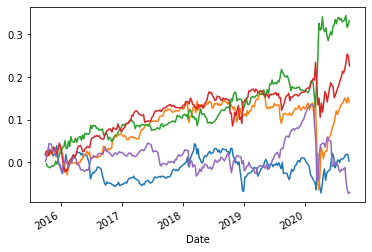

In [11]:
DAYS = [0,1,2,3,4]
for day in DAYS:
    result = df[df['dayOfWeek']==day]['y'].dropna().cumsum()
    result.plot(label = 'day' )

In [14]:
%matplotlib inline

<AxesSubplot:xlabel='dayOfWeek'>

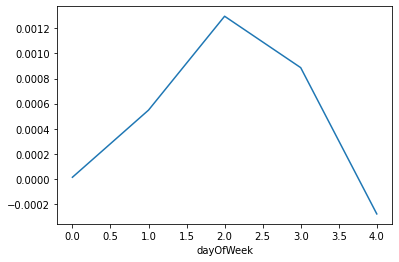

In [16]:
df.groupby('dayOfWeek').y.mean().plot()

In [8]:
df['dayOfWeek'] = preprocessing.scale(df['dayOfWeek'])
df['dayOfYear'] = preprocessing.scale(df['dayOfYear'])
df['numberOfDay'] = preprocessing.scale(df['numberOfDay'])

In [9]:

# df['x1'] = df['Open'] - df['High']
# df['x2'] = df['High'] - df['Low']
# df['x3'] = df['Close'] - df['Open']
df['y'] = df['Close'].shift(-1).pct_change(1)
df['y'] = np.where(df['y'] > 0, 1, 0)
print(df[['dayOfWeek', 'dayOfYear', 'numberOfDay','y']].describe())

          dayOfWeek     dayOfYear   numberOfDay            y
count  1.259000e+03  1.259000e+03  1.259000e+03  1259.000000
mean   1.197524e-16  1.015867e-16  2.113568e-15     0.555997
std    1.000397e+00  1.000397e+00  1.000397e+00     0.497052
min   -1.445984e+00 -1.737341e+00 -3.239661e+00     0.000000
25%   -7.317849e-01 -8.668698e-01 -6.200507e-01     0.000000
50%   -1.758553e-02  3.601352e-03  6.897544e-01     1.000000
75%    6.966138e-01  8.645068e-01  6.897544e-01     1.000000
max    1.410813e+00  1.734978e+00  6.897544e-01     1.000000


In [10]:
split = 0.8
df = df.reset_index()
df = df.dropna()
x_train = df[:int(len(df)*split)][['dayOfWeek', 'dayOfYear', 'numberOfDay']]
y_train = df[:int(len(df)*split)][['y']]
x_test = df[int(len(df)*split):][['dayOfWeek', 'dayOfYear', 'numberOfDay']]
y_test = df[int(len(df)*split):][['y']]

In [14]:
model = Sequential()
model.add(Dense(9, input_shape = (3,)))
model.add(Dense(3))
# model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.L2(l2=0.01)))
# model.add(Dense(9, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 9)                 36        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 30        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 4         
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


In [15]:
opt = SGD(lr=0.001, momentum = 1)
model.compile(optimizer= opt, loss= 'binary_crossentropy', metrics =['accuracy'])

In [19]:
history = model.fit(x_train, y_train, epochs= 100, batch_size=64, validation_split=0.3)

Epoch 1/100
11/11 [==============================] - 0s 18ms/step - loss: 7.1780 - accuracy: 0.5298 - val_loss: 7.3044 - val_accuracy: 0.5215
Epoch 2/100
11/11 [==============================] - 0s 7ms/step - loss: 7.1780 - accuracy: 0.5298 - val_loss: 7.3044 - val_accuracy: 0.5215
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 7.1780 - accuracy: 0.5298 - val_loss: 7.3044 - val_accuracy: 0.5215
Epoch 4/100
11/11 [==============================] - 0s 7ms/step - loss: 7.1780 - accuracy: 0.5298 - val_loss: 7.3044 - val_accuracy: 0.5215
Epoch 5/100
11/11 [==============================] - 0s 8ms/step - loss: 7.1780 - accuracy: 0.5298 - val_loss: 7.3044 - val_accuracy: 0.5215
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 7.1780 - accuracy: 0.5298 - val_loss: 7.3044 - val_accuracy: 0.5215
Epoch 7/100
11/11 [==============================] - 0s 5ms/step - loss: 7.1780 - accuracy: 0.5298 - val_loss: 7.3044 - val_accuracy: 0.5215
Epoch 8/100


In [20]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 2ms/step - loss: 5.9970 - accuracy: 0.6071


[5.997047424316406, 0.6071428656578064]

In [21]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    # plt.plot(history.history['val_'+metric],'')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

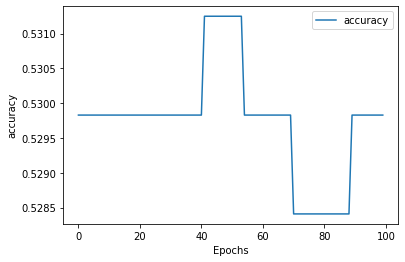

In [22]:
plot_graphs(history, 'accuracy')